### K-Means Clustering_Introduction
In clustering, we do not have a target to predict. We look at the data and then try to club similar observations and form different groups. Hence it is an unsupervised learning problem.

Properties:
1. All the data points in a cluster should be similar to each other
2. The data points from different clusters should be as different as possible.


***Evaluation Metrics for Clustering***
1. Inertia
             It tells us how far the points within a cluster are. So, inertia actually calculates the sum of distances of all the points within a cluster from the centroid of that cluster.
             
2. Dunn Index
             that different clusters should be as different from each other as possible.Along with the distance between the centroid and points, the Dunn index also takes into account the distance between two clusters. This distance between the centroids of two different clusters is known as inter-cluster distance.
             
             Dunn index = min(inter cluster distance)/max(intra cluster distance)   -> maximize the Dunn index
             -> min(inter cluster distance) --- Clusters are far apart
             -> max(intra cluster distance)  ---- clusters are compact.
             --> Inter-cluster distance d(a, b) between two clusters a and b 
             --> Intra-cluster distance D(a) of a cluster   #https://www.geeksforgeeks.org/dunn-index-and-db-index-cluster-validity-indices-set-1/
----------------

***K-Means Algorithm:*****

---> K-means is a centroid-based algorithm, or a distance-based algorithm, where we calculate the distances to assign a point to a cluster. In K-Means, each cluster is associated with a centroid.
---> The main objective of the K-Means algorithm is to minimize the sum of distances between the points and their respective cluster centroid.

Step 1: Choose the number of clusters k
Step 2: Select k random points from the data as centroids
Step 3: Assign all the points to the closest cluster centroid
Step 4: Recompute the centroids of newly formed clusters
Step 5: Repeat steps 3 and 4

Stopping Criteria for K-Means Clustering

There are essentially three stopping criteria that can be adopted to stop the K-means algorithm:

    Centroids of newly formed clusters do not change
    Points remain in the same cluster
    Maximum number of iterations are reached
------

# Implementing K-Means Clustering in Python from Scratch

In [1]:
#import libraries
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt
import os

In [3]:
os.chdir(r'C:\Users\VigneshSS\Desktop\Python for Business Analytics and Data Science\K-MeansClustering_Python')

In [4]:
data = pd.read_csv('clustering.csv')
data.head()

Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001003   Male     Yes          1      Graduate            No   
1  LP001005   Male     Yes          0      Graduate           Yes   
2  LP001006   Male     Yes          0  Not Graduate            No   
3  LP001008   Male      No          0      Graduate            No   
4  LP001013   Male     Yes          0  Not Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             4583             1508.0       128.0             360.0   
1             3000                0.0        66.0             360.0   
2             2583             2358.0       120.0             360.0   
3             6000                0.0       141.0             360.0   
4             2333             1516.0        95.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Rural           N  
1             1.0         Urban           Y  
2             1.0         Urban           Y  
3             1.0         Urban           Y  
4             1.0         Urban           Y

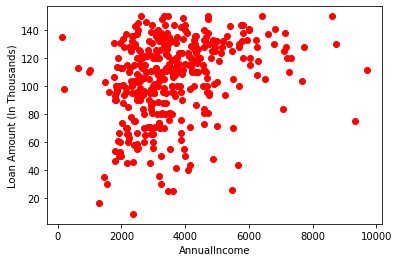

In [5]:
X = data[["LoanAmount","ApplicantIncome"]]
#Visualise data points
plt.scatter(X["ApplicantIncome"],X["LoanAmount"],c='red')
plt.xlabel('AnnualIncome')
plt.ylabel('Loan Amount (In Thousands)')
plt.show()

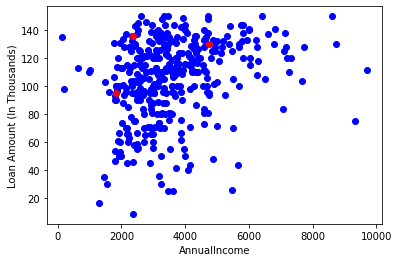

In [7]:
# Step 1 and 2 - Choose the number of clusters (k) and select random centroid for each cluster

#number of clusters
K=3

# Select random observation as centroids
Centroids = (X.sample(n=K))
plt.scatter(X["ApplicantIncome"],X["LoanAmount"],c='blue')
plt.scatter(Centroids["ApplicantIncome"],Centroids["LoanAmount"],c='red')
plt.xlabel('AnnualIncome')
plt.ylabel('Loan Amount (In Thousands)')
plt.show()

In [10]:
# Step 3 - Assign all the points to the closest cluster centroid
# Step 4 - Recompute centroids of newly formed clusters
# Step 5 - Repeat step 3 and 4

diff = 1
j=0

while(diff!=0):
    XD=X
    i=1
    for index1,row_c in Centroids.iterrows():
        ED=[]
        for index2,row_d in XD.iterrows():
            d1=(row_c["ApplicantIncome"]-row_d["ApplicantIncome"])**2
            d2=(row_c["LoanAmount"]-row_d["LoanAmount"])**2
            d=np.sqrt(d1+d2)
            ED.append(d)
        X[i]=ED
        i=i+1

    C=[]
    for index,row in X.iterrows():
        min_dist=row[1]
        pos=1
        for i in range(K):
            if row[i+1] < min_dist:
                min_dist = row[i+1]
                pos=i+1
        C.append(pos)
    X["Cluster"]=C
    Centroids_new = X.groupby(["Cluster"]).mean()[["LoanAmount","ApplicantIncome"]]
    if j == 0:
        diff=1
        j=j+1
    else:
        diff = (Centroids_new['LoanAmount'] - Centroids['LoanAmount']).sum() + (Centroids_new['ApplicantIncome'] - Centroids['ApplicantIncome']).sum()
        print(diff.sum())
    Centroids = X.groupby(["Cluster"]).mean()[["LoanAmount","ApplicantIncome"]]

C:\Users\VigneshSS\Anaconda3\envs\new_env\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\VigneshSS\Anaconda3\envs\new_env\lib\site-packages\ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


632.6818493218015
484.9004928402873
380.4439783458536
399.0037025214242
171.01260458477708
230.6385217291991
284.4697428802208
211.49712199238922
223.05789077458954
196.02528244567318
98.01161657776196
52.84741626127729
98.54724443834282
90.64953219227577
18.274686272279013
9.21023994083339
18.345487493007468
46.27013250786139
0.0


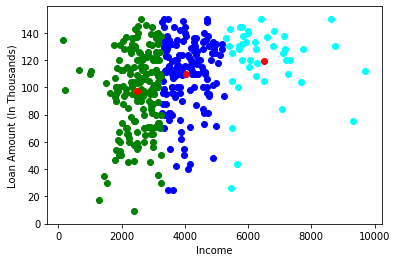

In [11]:
color=['blue','green','cyan']
for k in range(K):
    data=X[X["Cluster"]==k+1]
    plt.scatter(data["ApplicantIncome"],data["LoanAmount"],c=color[k])
plt.scatter(Centroids["ApplicantIncome"],Centroids["LoanAmount"],c='red')
plt.xlabel('Income')
plt.ylabel('Loan Amount (In Thousands)')
plt.show()

# K-Means++ to Choose Initial Cluster Centroids for K-Means Clustering

# Implementing K-Means Clustering in Python

In [17]:
# importing required libraries
from sklearn.cluster import KMeans

#distances is the pairwise distance matrix
#from sklearn.metrics.pairwise import pairwise_distances
#distances = pairwise_distances(your_dataset)

In [12]:
data_df=pd.read_csv("Wholesale customers data.csv")
data_df.head()

Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185

In [13]:
# statistics of the data
data_df.describe()

Channel      Region          Fresh          Milk       Grocery  \
count  440.000000  440.000000     440.000000    440.000000    440.000000   
mean     1.322727    2.543182   12000.297727   5796.265909   7951.277273   
std      0.468052    0.774272   12647.328865   7380.377175   9503.162829   
min      1.000000    1.000000       3.000000     55.000000      3.000000   
25%      1.000000    2.000000    3127.750000   1533.000000   2153.000000   
50%      1.000000    3.000000    8504.000000   3627.000000   4755.500000   
75%      2.000000    3.000000   16933.750000   7190.250000  10655.750000   
max      2.000000    3.000000  112151.000000  73498.000000  92780.000000   

             Frozen  Detergents_Paper    Delicassen  
count    440.000000        440.000000    440.000000  
mean    3071.931818       2881.493182   1524.870455  
std     4854.673333       4767.854448   2820.105937  
min       25.000000          3.000000      3.000000  
25%      742.250000        256.750000    408.250000  
50%     1526.000000        816.500000    965.500000  
75%     3554.250000       3922.000000   1820.250000  
max    60869.000000      40827.000000  47943.000000

In [15]:
#Since K-Means is a distance-based algorithm, this difference of magnitude can create a problem. So let’s first bring all the variables to the same magnitude

# standardizing the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_df)

# statistics of scaled data
pd.DataFrame(data_scaled, columns= data_df.columns).describe()

#Normalisation of data
from sklearn.preprocessing import normalize
data_scaled = normalize(data)
data_scaled = pd.DataFrame(data_scaled, columns=data.columns)
data_scaled.head()

Channel        Region         Fresh          Milk       Grocery  \
count  4.400000e+02  4.400000e+02  4.400000e+02  4.400000e+02  4.400000e+02   
mean  -2.452584e-16 -5.737834e-16 -2.422305e-17 -1.589638e-17 -6.030530e-17   
std    1.001138e+00  1.001138e+00  1.001138e+00  1.001138e+00  1.001138e+00   
min   -6.902971e-01 -1.995342e+00 -9.496831e-01 -7.787951e-01 -8.373344e-01   
25%   -6.902971e-01 -7.023369e-01 -7.023339e-01 -5.783063e-01 -6.108364e-01   
50%   -6.902971e-01  5.906683e-01 -2.767602e-01 -2.942580e-01 -3.366684e-01   
75%    1.448652e+00  5.906683e-01  3.905226e-01  1.890921e-01  2.849105e-01   
max    1.448652e+00  5.906683e-01  7.927738e+00  9.183650e+00  8.936528e+00   

             Frozen  Detergents_Paper    Delicassen  
count  4.400000e+02      4.400000e+02  4.400000e+02  
mean   1.135455e-17     -1.917658e-17 -8.276208e-17  
std    1.001138e+00      1.001138e+00  1.001138e+00  
min   -6.283430e-01     -6.044165e-01 -5.402644e-01  
25%   -4.804306e-01     -5.511349e-01 -3.964005e-01  
50%   -3.188045e-01     -4.336004e-01 -1.985766e-01  
75%    9.946441e-02      2.184822e-01  1.048598e-01  
max    1.191900e+01      7.967672e+00  1.647845e+01

In [18]:
# defining the kmeans function with initialization as k-means++
kmeans = KMeans(n_clusters=2, init='k-means++')

# fitting the k means algorithm on scaled data
kmeans.fit(data_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [32]:
# inertia on the fitted data
kmeans.inertia_
#kmeans.dunn_

584.1106103998314

Text(0, 0.5, 'Inertia')

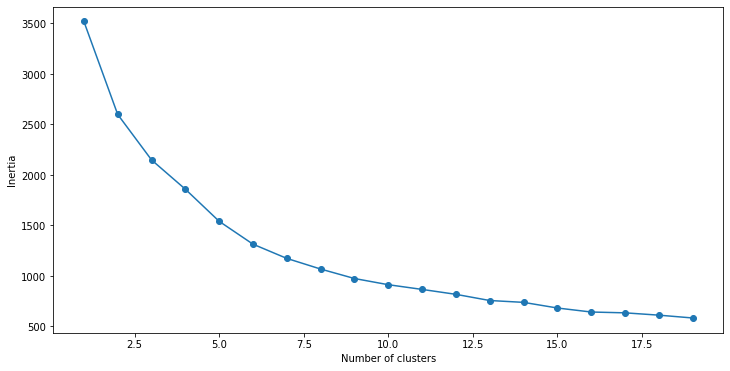

In [29]:
# fitting multiple k-means algorithms and storing the values in an empty list
SSE = []
for cluster in range(1,20):
    kmeans = KMeans(n_jobs = -1, n_clusters = cluster, init='k-means++')
    kmeans.fit(data_scaled)
    SSE.append(kmeans.inertia_)  
    #SSE.append(kmeans.dunn_)
    
# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,20), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [21]:
# k means using 5 clusters and k-means++ initialization
kmeans = KMeans(n_jobs = -1, n_clusters = 5, init='k-means++')
kmeans.fit(data_scaled)
pred = kmeans.predict(data_scaled)

In [24]:
frame = pd.DataFrame(data_scaled, columns= data_df.columns)
frame['cluster'] = pred
frame.head(2)

Channel    Region     Fresh      Milk   Grocery    Frozen  \
0  1.448652  0.590668  0.052933  0.523568 -0.041115 -0.589367   
1  1.448652  0.590668 -0.391302  0.544458  0.170318 -0.270136   

   Detergents_Paper  Delicassen  cluster  
0         -0.043569   -0.066339        3  
1          0.086407    0.089151        3

In [25]:
frame['cluster'].value_counts()

0    211
3    126
4     92
1     10
2      1
Name: cluster, dtype: int64


### ***OverView***

Here’s a brief overview of how K-means works:

    Decide the number of clusters (k)
    Select k random points from the data as centroids
    Assign all the points to the nearest cluster centroid
    Calculate the centroid of newly formed clusters
    Repeat steps 3 and 4

It is an iterative process. It will keep on running until the centroids of newly formed clusters do not change or the maximum number of iterations are reached.

-----

***Disadvantages***

1. It always tries to make clusters of the same size.
2. Have to decide the number of clusters at the beginning of the algorithm. Ideally, we would not know how many clusters should we have, in the beginning of the algorithm and hence it a challenge with K-means.


https://www.analyticsvidhya.com/blog/2019/08/comprehensive-guide-k-means-clustering/

https://www.analyticsvidhya.com/blog/2018/06/comprehensive-guide-recommendation-engine-python/?utm_source=blog&utm_medium=comprehensive-guide-k-means-clustering